In [25]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [11]:
file_path=r'C:\Users\HP\Downloads\mall_Custmoers\Mall_Custmoers.csv'
data=pd.read_csv(file_path)


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              250 non-null    int64 
 1   Gender                  250 non-null    object
 2   Age                     250 non-null    int64 
 3   Annual Income (k$)      250 non-null    int64 
 4   Spending Score (1-100)  250 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.9+ KB


In [13]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

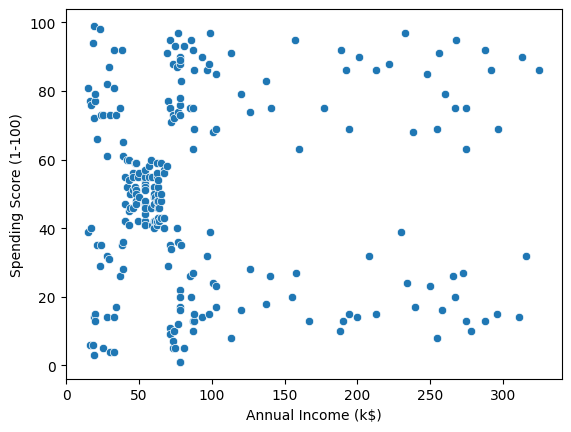

In [21]:
sns.scatterplot(data=data,x='Annual Income (k$)',y='Spending Score (1-100)')

In [22]:
x=data[['Annual Income (k$)','Spending Score (1-100)']]

In [23]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
245,297,69
246,311,14
247,313,90
248,316,32


In [38]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

In [39]:
wcss

[1673624.5,
 440146.70193894394,
 350813.6678487495,
 257469.2495581976,
 226845.86790239363,
 160901.92915504627,
 128434.20105540697,
 99238.24807042132,
 78123.16798641859,
 69006.68032028357]

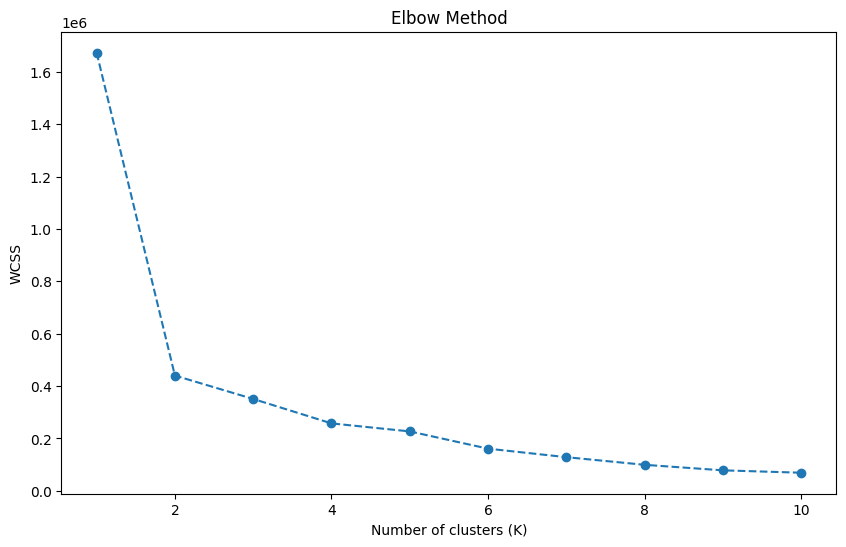

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [42]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)


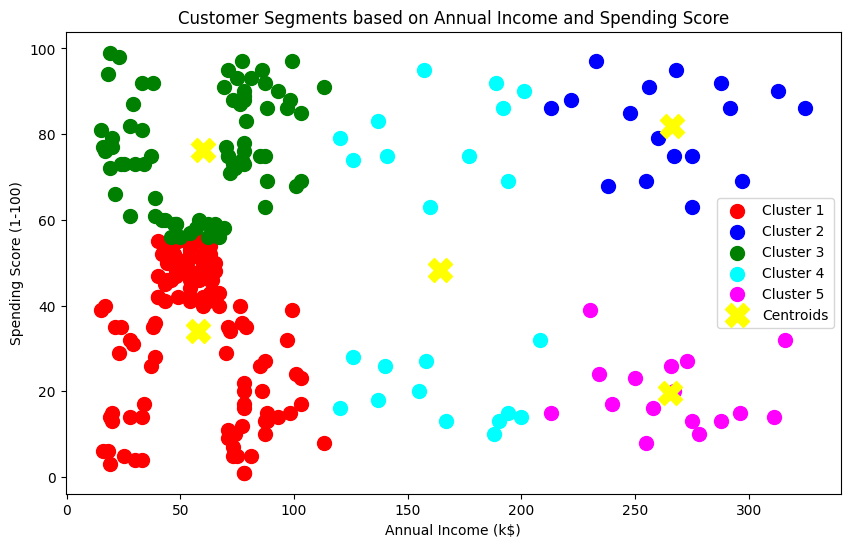

In [44]:
plt.figure(figsize=(10, 6))

# Plot each cluster in a different color
plt.scatter(x.values[y_kmeans == 0, 0], x.values[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x.values[y_kmeans == 1, 0], x.values[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x.values[y_kmeans == 2, 0], x.values[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(x.values[y_kmeans == 3, 0], x.values[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(x.values[y_kmeans == 4, 0], x.values[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', marker='X', label='Centroids')

# Labels and title
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
